In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Data Analysis

### Distribution of Annual Income

C:\Users\HP\AppData\Local\Temp\ipykernel_25316\1673438173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

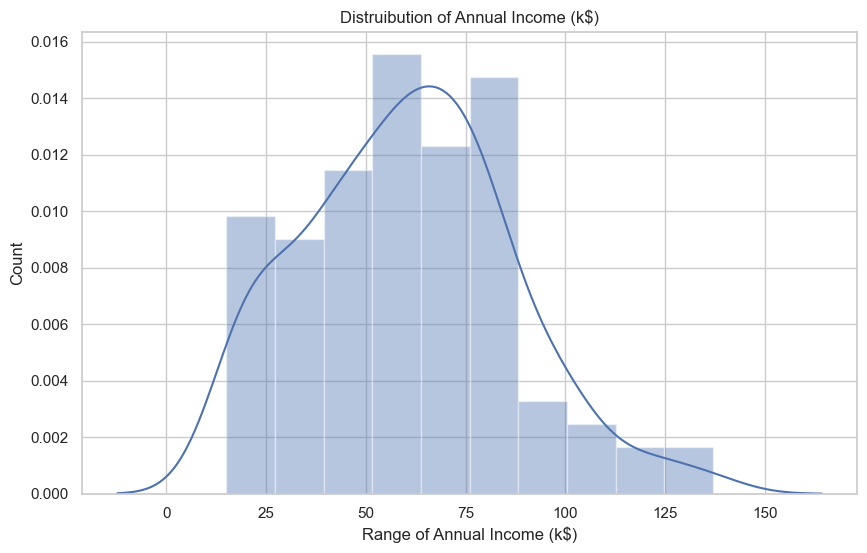

In [8]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.distplot(data['Annual Income (k$)'])
plt.title('Distruibution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

### Distribution of Age

C:\Users\HP\AppData\Local\Temp\ipykernel_25316\735483018.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

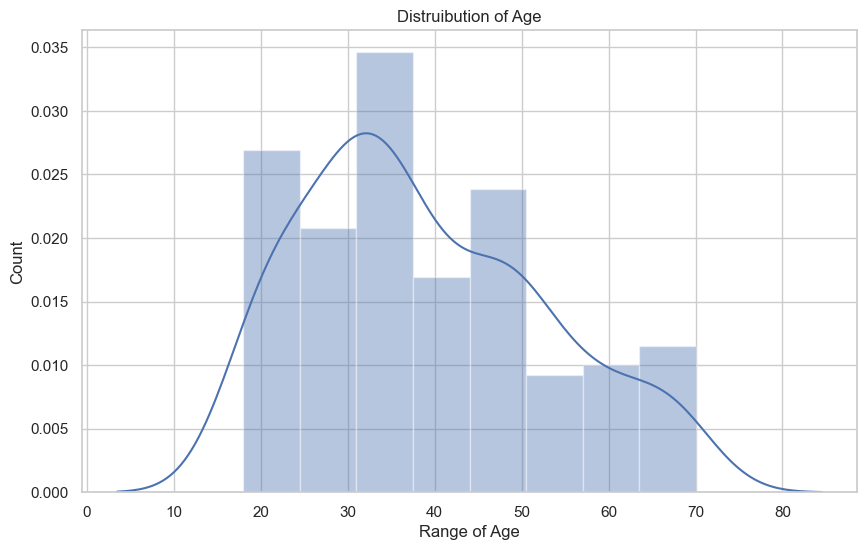

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.distplot(data['Age'])
plt.title('Distruibution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

### Distrubution of Spending Score

C:\Users\HP\AppData\Local\Temp\ipykernel_25316\1385433645.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

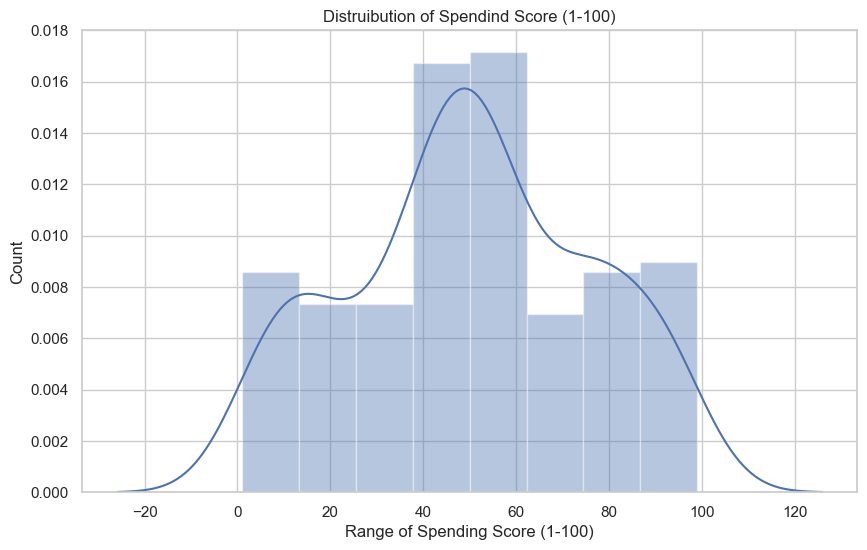

In [10]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distruibution of Spendind Score (1-100)')
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

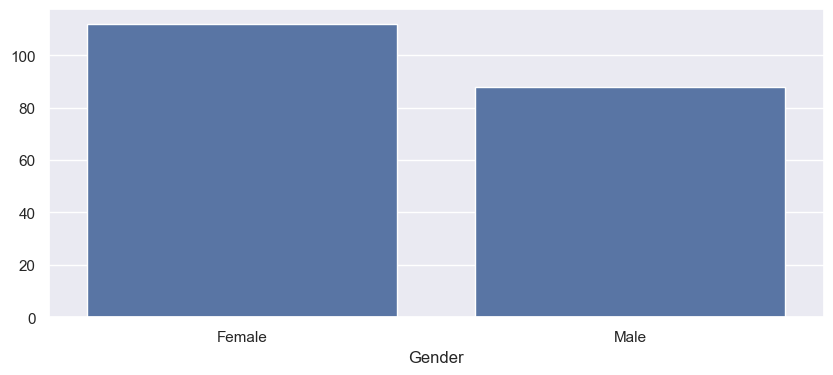

In [11]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
df =data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [14]:
X =df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


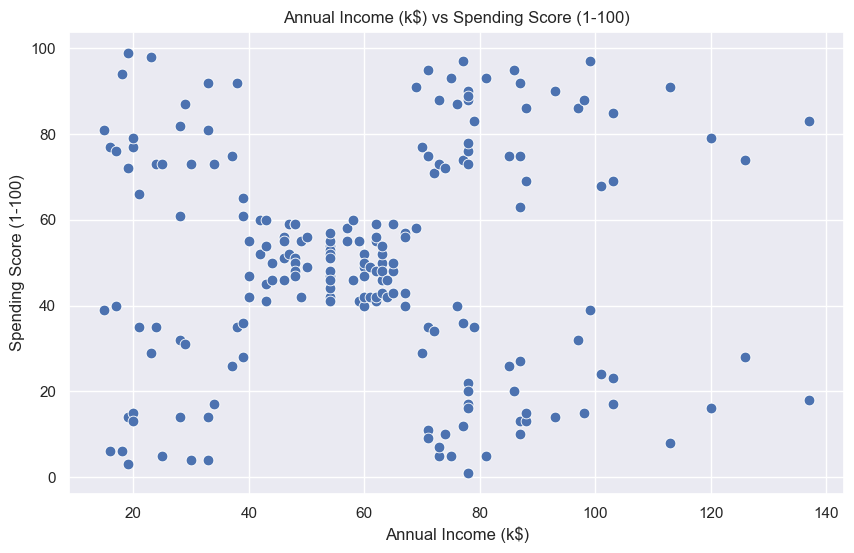

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s = 60)
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [19]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)   
    wcss.append(km.inertia_)

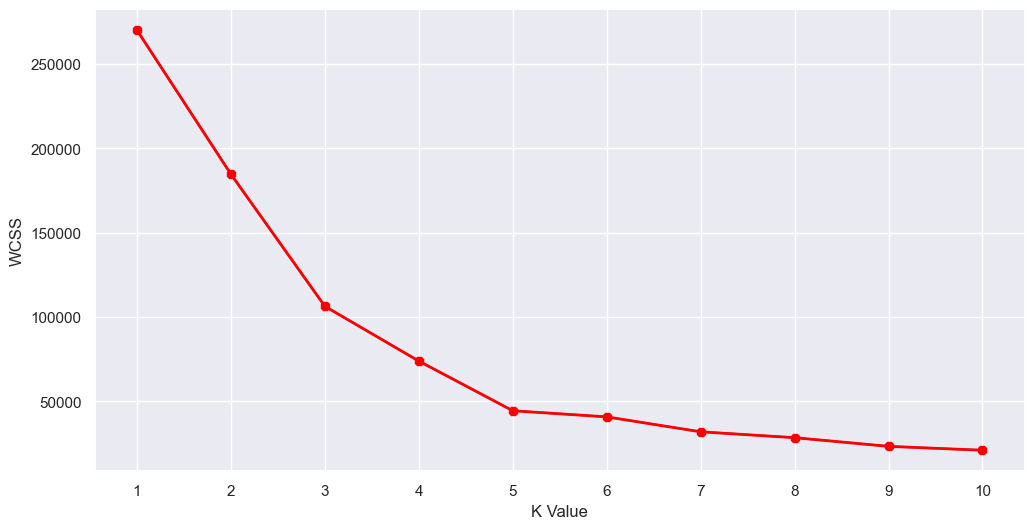

In [20]:
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11),wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [21]:
km1 = KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df['label'] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


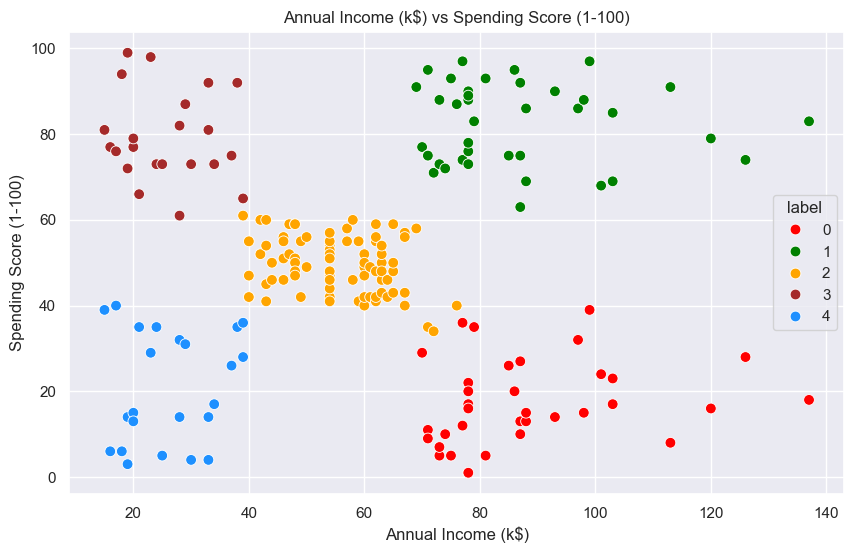

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='label', 
                palette=['red', 'green', 'orange', 'brown', 'dodgerblue'], legend=True, s=60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')

plt.show()


In [26]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1['CustomerID'].values)
print("-------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2['CustomerID'].values)
print("-------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3['CustomerID'].values)
print("-------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4['CustomerID'].values)
print("-------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5['CustomerID'].values)
print("-------------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
-------------------------------------------
Number of customer in 2nd group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
-------------------------------------------
Number of customer in 3rd group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
-------------------------------------------
Number of customer in 4th group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 3

### Clustering on the basics of 3D Data

In [27]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [28]:
df2 = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [29]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
X2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [35]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(X2)   
    wcss.append(km.inertia_)

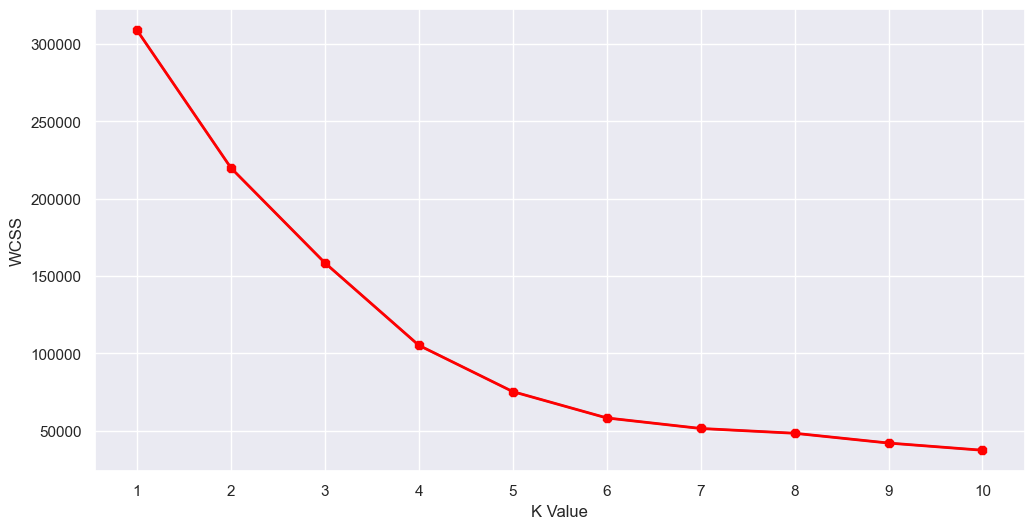

In [36]:
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11),wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [38]:
km2 = KMeans(n_clusters=5)
km2.fit(X)
y2=km2.predict(X2)
df2['label'] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [39]:
from mpl_toolkits.mplot3d import Axes3D

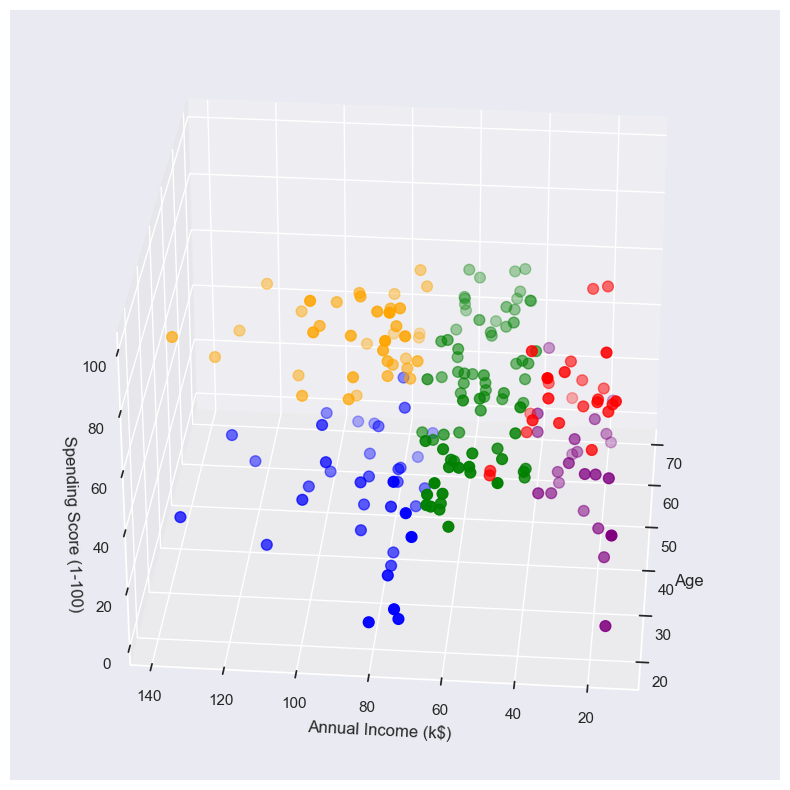

In [42]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2['Annual Income (k$)'][df2.label == 0], df2['Spending Score (1-100)'][df2.label == 0], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 1], df2['Annual Income (k$)'][df2.label == 1], df2['Spending Score (1-100)'][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2['Annual Income (k$)'][df2.label == 2], df2['Spending Score (1-100)'][df2.label == 2], c='green', s=60)
ax.scatter(df2.Age[df2.label == 3], df2['Annual Income (k$)'][df2.label == 3], df2['Spending Score (1-100)'][df2.label == 3], c='orange', s=60)
ax.scatter(df2.Age[df2.label == 4], df2['Annual Income (k$)'][df2.label == 4], df2['Spending Score (1-100)'][df2.label == 4], c='purple', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [44]:
cust1=df2[df2["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1['CustomerID'].values)
print("-------------------------------------------")
cust2=df2[df2["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2['CustomerID'].values)
print("-------------------------------------------")
cust3=df2[df2["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3['CustomerID'].values)
print("-------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4['CustomerID'].values)
print("-------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5['CustomerID'].values)
print("-------------------------------------------")

Number of customer in 1st group= 37
They are - [125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]
-------------------------------------------
Number of customer in 2nd group= 25
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 66
 69]
-------------------------------------------
Number of customer in 3rd group= 76
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 127]
-------------------------------------------
Number of customer in 4th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 19

In [45]:
print("The End")

The End
